In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout

In [2]:
path = '/Users/michalokon/Desktop/images/'

X_train = np.loadtxt(path+'input.csv', delimiter = ',')
Y_train = np.loadtxt(path+'labels.csv', delimiter = ',')

X_test = np.loadtxt(path+'input_test.csv', delimiter = ',')
Y_test = np.loadtxt(path+'labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


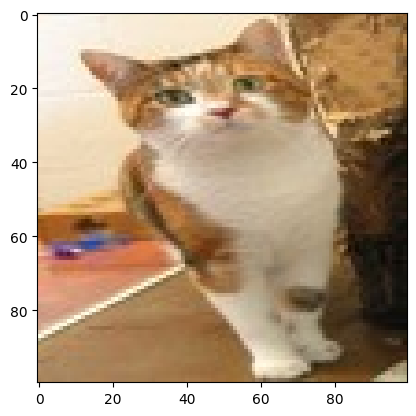

In [5]:
index = random.randint(0,len(X_train))
plt.imshow(X_train[index,:])
plt.show()

In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7047 - loss: 0.5572
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7672 - loss: 0.4841
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7679 - loss: 0.4775
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7875 - loss: 0.4523
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.8133 - loss: 0.4085
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8249 - loss: 0.3776
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.8300 - loss: 0.3773
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8564 - loss: 0.3276
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.8681 - loss: 0.3064
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8700 - loss: 0.2901
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8739 - loss: 0.2625
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step

In [92]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6608 - loss: 0.8445


[0.8079938292503357, 0.6850000023841858]

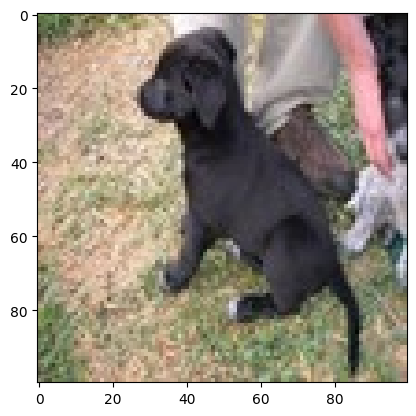

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.41288483]]
Model says it is a dog


In [91]:
index2 = random.randint(0,len(Y_test))
plt.imshow(X_test[index2,:])
plt.show()

y_predict=model.predict(X_test[index2,:].reshape(1,100,100,3))
print(y_predict)

if(y_predict > 0.5):
    predict = 'cat'
    
else:
    predict = 'dog'
    
print("Model says it is a", predict)